# Using LinearRegression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [7]:
# polynomial of degree 2
# y = 0.8x^2 + 0.9x + 2

X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

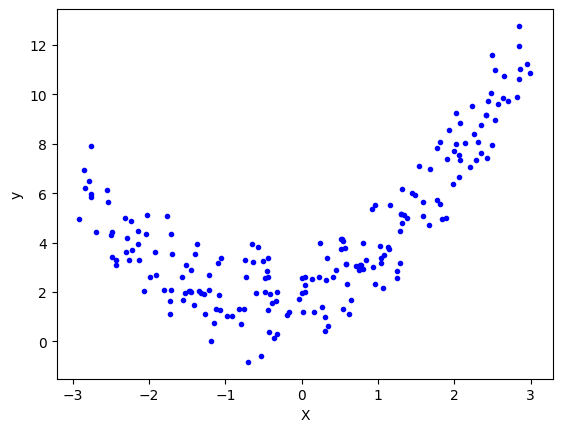

In [8]:
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [9]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [10]:
# applying LR
lr = LinearRegression()

In [11]:
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.3420628197007698

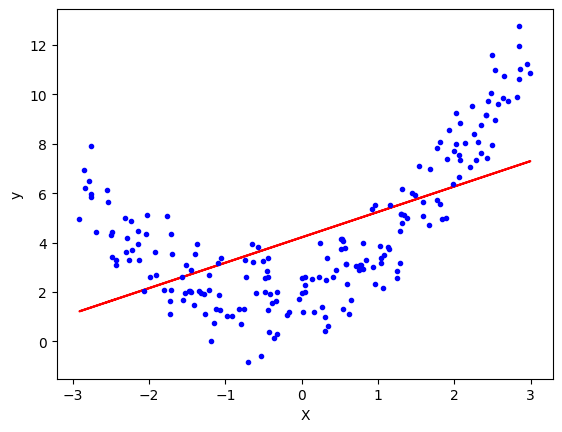

In [13]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Using Polynomial Regression

In [24]:
# degree = 2
# remember it only applies on X not on y and
# also you have to apply this transfrom on train and test
# here is a one parameter include_bias with boolean values true or false
# by default its true mean you include X^0
# if you set it to false mean you dont include X^0
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_trans = poly.fit_transform(X_train)
y_test_trans = poly.transform(X_test)

In [25]:
print(X_train[0])
print(X_train_trans[0])

[-2.43234637]
[ 1.         -2.43234637  5.91630885]


In [26]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train)

LinearRegression()

In [27]:
y_pred = lr.predict(y_test_trans)

In [28]:
r2_score(y_test, y_pred)

0.8623443679640179

In [29]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.95048597 0.81601148]]
[1.95393825]


In [30]:
X_new = np.linspace(-3, 3, 200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

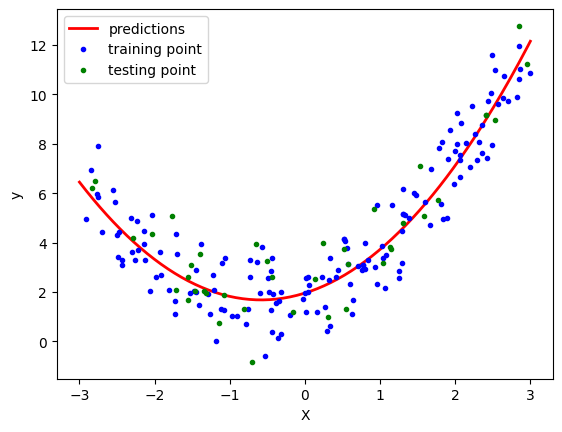

In [32]:
plt.plot(X_new,y_new,'r-',linewidth=2,label='predictions')
plt.plot(X_train,y_train,'b.',label='training point')
plt.plot(X_test,y_test,'g.',label='testing point')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## our own function

In [33]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

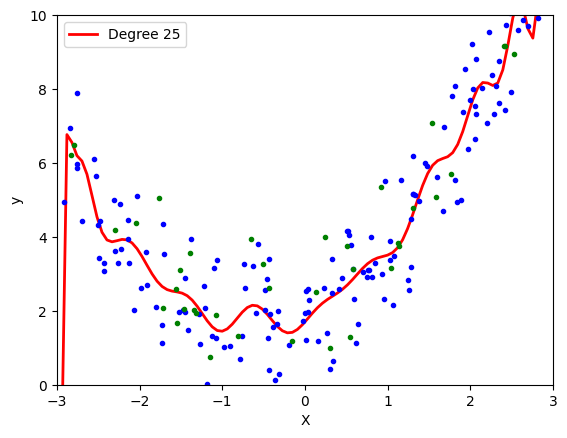

In [35]:
polynomial_regression(25)